# 决策树
泰坦尼克生还预测数据集

In [4]:
from  sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from pathlib2 import Path

In [5]:
cls = DecisionTreeClassifier()

In [4]:
cls

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

- 一般会调整的参数是 
> criterion= gini CART 算法   
criterion = entropy  ID3算法   
max_depth 控制最大深度防止过拟合

- 然后方法有
> fit(features,labels) 拟合模型  
predict(test_features) 测试集合预测  
score(test_features, test_lables) 返回测试的正确率  

# 数据集准备和处理
来源：    https://github.com/cystanford/Titanic_Data

In [6]:
dataDir = Path('data')
traindir = dataDir/'Titanic_Data/train.csv'

traindata = pd.read_csv(traindir)

In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- PassengerId id
- Survived 是否存活
- Pclass         船票等级
- Name           姓名
- Sex     、Age        
- SibSp          亲戚数量：兄妹配偶\
- Parch         亲戚数量:父母、子女
- Ticket        票号码
- Fare           票价格
- Cabin          船舱号码
- Embarked       登录港口

In [22]:
traindata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
traindata.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Holverson, Mr. Alexander Oskar",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### 我们发现有重要字段缺失
1. 年龄  714
2. Fare票价
3. Cabin 船舱
4. Embarked 登陆点


## 2.用直方图直观感受

In [8]:
import matplotlib.pyplot as plt

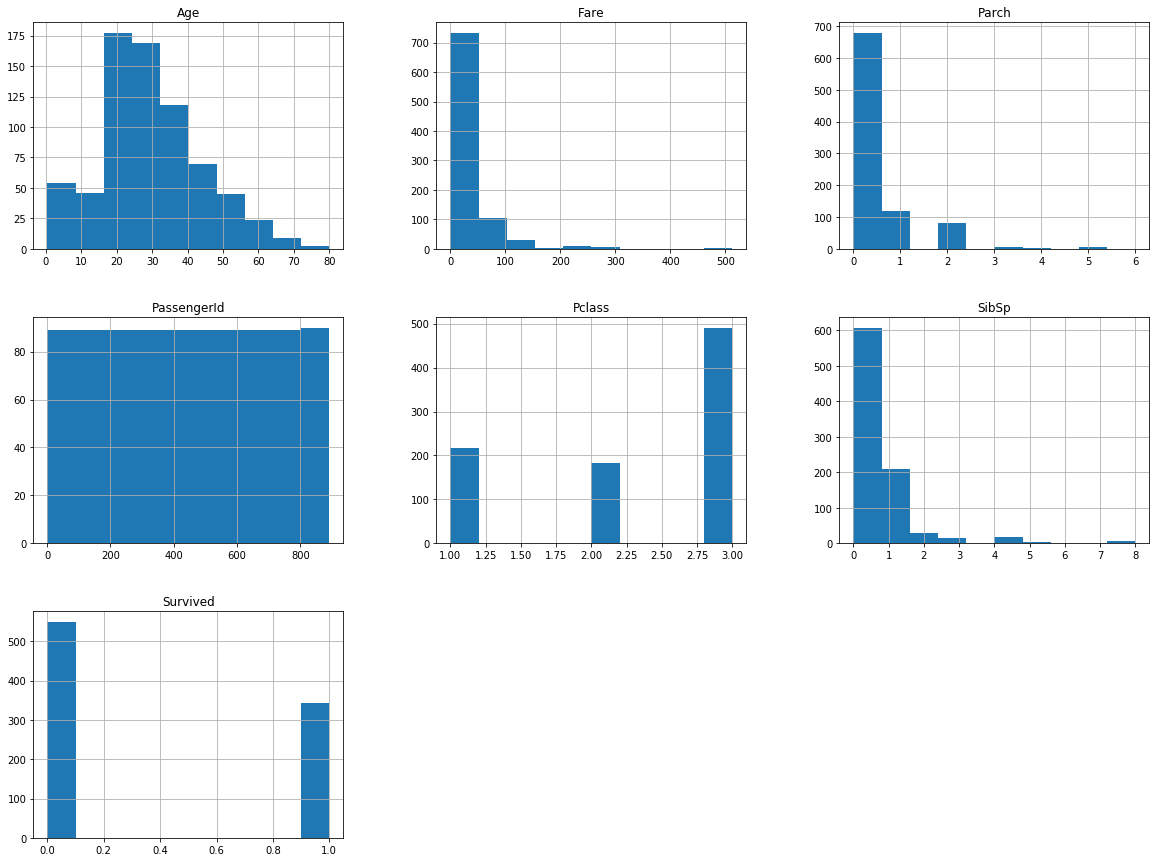

In [9]:
traindata.hist(figsize= (20,15))
plt.show()

## 3.填充数据
数值类型：年龄、票价用均值；   
字符类型 ： 船舱号无法补齐（204/891）  
字符类型： 登录港口（889/891）,我们尝试用全部用某一个最大港口填充

In [29]:
traindata['Age'].fillna(traindata['Age'].mean(), inplace =True)
traindata['Fare'].fillna(traindata['Fare'].mean(), inplace =True)

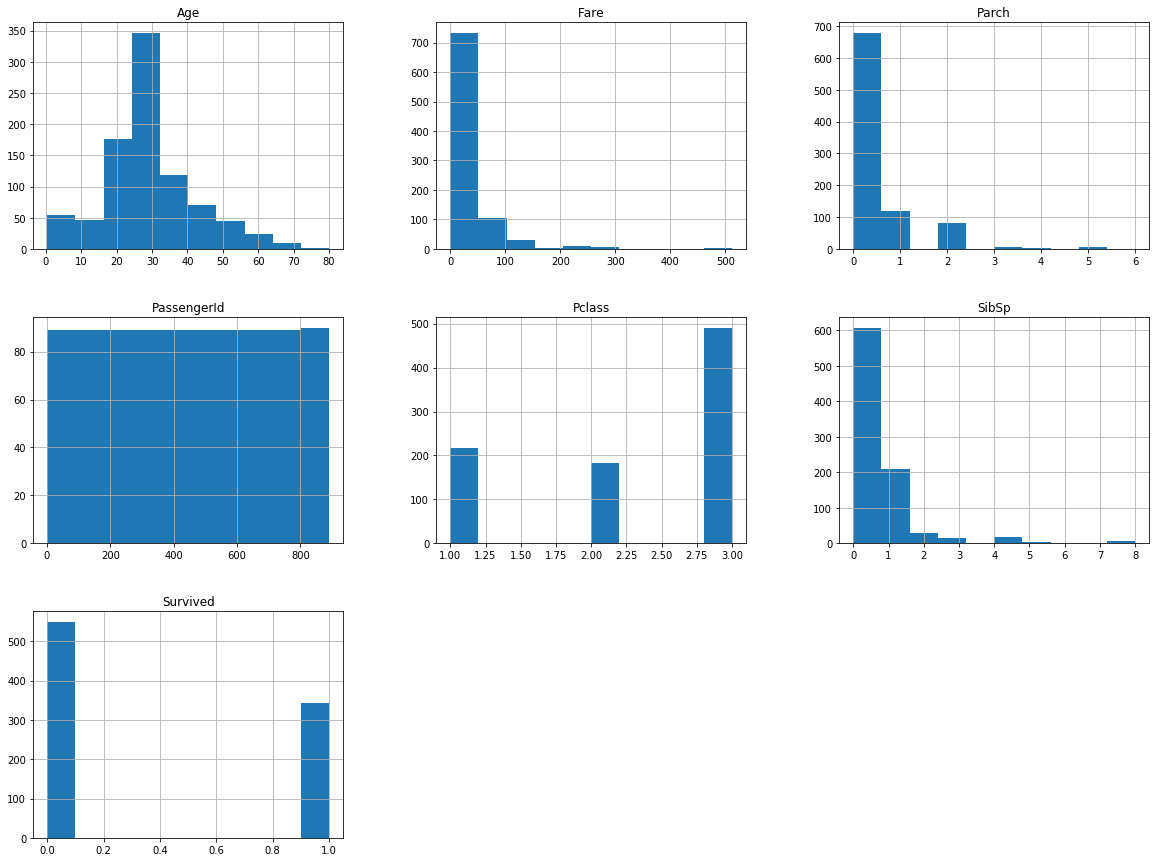

In [11]:
traindata.hist(figsize= (20,15))
plt.show()

In [41]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
traindata['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

嗯 S 港口最多，我门吧缺失的填充为S

In [30]:
traindata['Embarked'].fillna('S',inplace= True)

In [31]:
traindata['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# 3. 特征选择

- PassengerId id 
- Survived 是否存活
- Pclass         船票等级 【ok】
- Name           姓名
- Sex    【ok】 
- Age    【ok】  
- SibSp          亲戚数量：兄妹配偶\
- Parch         亲戚数量:父母、子女
- Ticket        票号码
- Fare           票价格 【ok】
- Cabin          船舱号码【ok】
- Embarked       登录港口【ok】

In [12]:
featrues = ['Pclass','Sex','Age','Fare','SibSp', 'Parch','Embarked']

In [32]:
train_featrues = traindata[featrues]
train_lables = traindata['Survived']

In [14]:
train_featrues.head(10)

,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked
0,3,male,22.000000,7.2500,1,0,S
1,1,female,38.000000,71.2833,1,0,C
2,3,female,26.000000,7.9250,0,0,S
3,1,female,35.000000,53.1000,1,0,S
4,3,male,35.000000,8.0500,0,0,S
5,3,male,29.699118,8.4583,0,0,Q
6,1,male,54.000000,51.8625,0,0,S
7,3,male,2.000000,21.0750,3,1,S
8,3,female,27.000000,11.1333,0,2,S
9,2,female,14.000000,30.0708,1,0,C


In [66]:
train_featrues.describe()

,Pclass,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.523008,0.381594
std,0.836071,13.002015,49.693429,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000,0.000000
50%,3.000000,29.699118,14.454200,0.000000,0.000000
75%,3.000000,35.000000,31.000000,1.000000,0.000000
max,3.000000,80.000000,512.329200,8.000000,6.000000


对特征里的字符号串变量做数值化处理  
DictVectorizer 做one-hot 以及矩阵化

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
dic2Vec = DictVectorizer(sparse=False)
train_featrues_new = dic2Vec.fit_transform(train_featrues.to_dict(orient ='record'))

In [21]:
dic2Vec.feature_names_

['Age',
 'Embarked',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex=female',
 'Sex=male',
 'SibSp']

# 4.进行训练

In [34]:
np.isnan(train_featrues_new).any()

False

In [35]:
train_featrues_new

array([[22.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [29.69911765,  0.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [26.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [32.        ,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [18]:
from sklearn.tree import  DecisionTreeClassifier

In [37]:
cls = DecisionTreeClassifier(criterion = 'entropy')
cls.fit(train_featrues_new,train_lables)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 4.1 自评估
用训练数据和训练标签自己打分

In [38]:
acc_rate = cls.score(train_featrues_new,train_lables)
print('准确率为 %f'%acc_rate)

准确率为 0.982043


## 4.2 k-fold交叉验证

In [39]:
from sklearn.model_selection import cross_val_score

In [43]:
scores = cross_val_score(cls ,train_featrues_new ,train_lables, cv =10)
print('交叉验证正确率为 %f'%scores.mean())

交叉验证正确率为 0.775676


In [44]:
scores

array([0.68888889, 0.77777778, 0.68539326, 0.82022472, 0.84269663,
       0.74157303, 0.83146067, 0.73033708, 0.82022472, 0.81818182])

正确率为 77% 这个才是此模型真正的正确率

#  5.决策树可视化-graphviz

In [50]:
import graphviz # doctest: +SKIP
from sklearn import tree
from IPython.display import Image  # 为了在notebook里直接显示
import pydotplus 

In [62]:
import os
# 环境变量找不到
os.environ["PATH"] += os.pathsep + 'G:/Enviroments/graphviz-2.38/bin/'

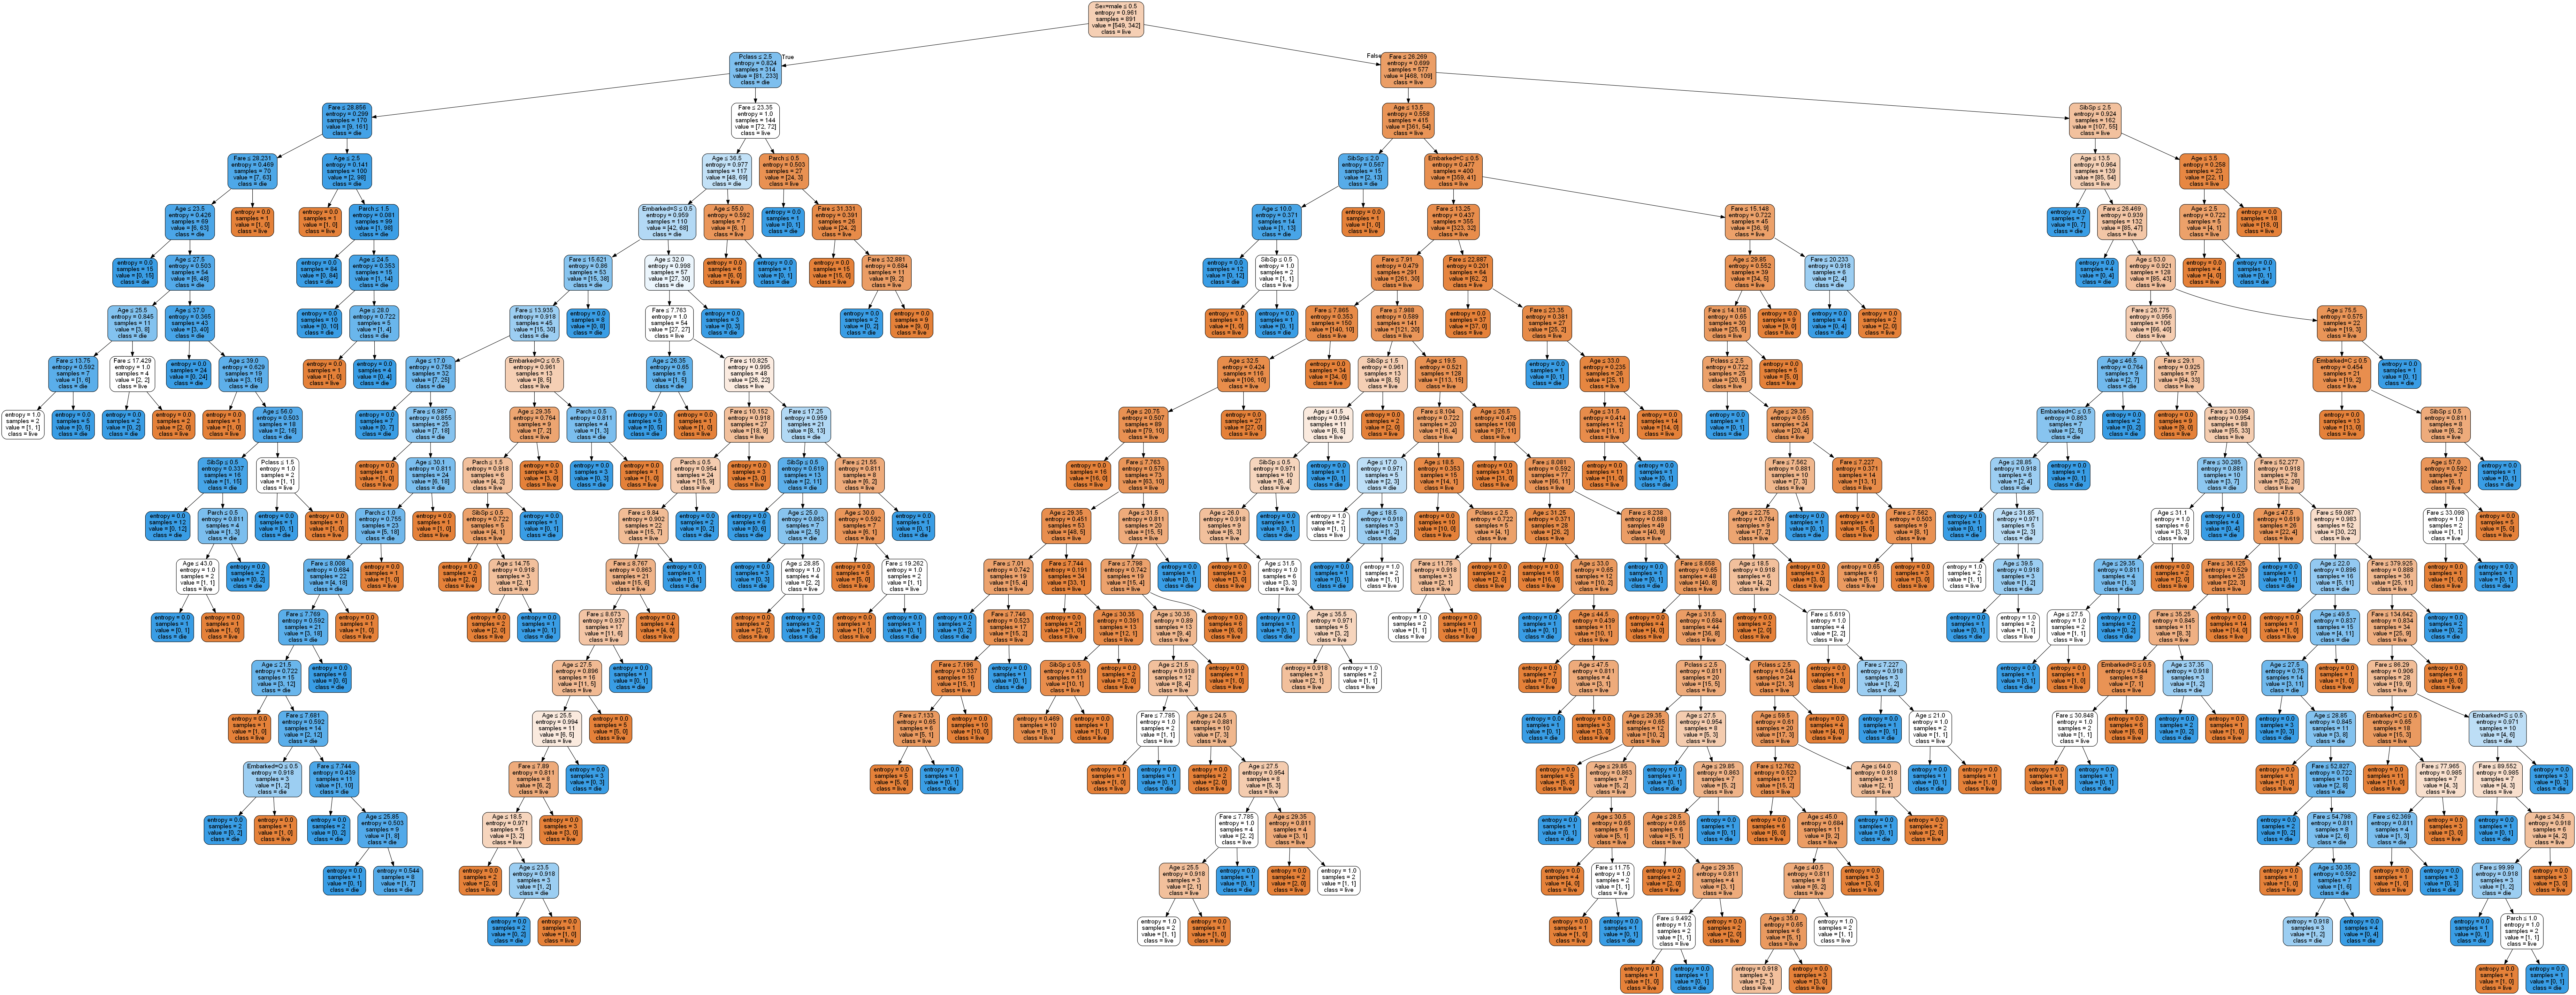

In [61]:

dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=dic2Vec.feature_names_,  
                         class_names=['live','die'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

#  6.模型保存

In [63]:
from sklearn.externals import joblib


In [69]:
joblib.dump(cls,"decision_tree_taitanik.pkl")

['decision_tree_taitanik.pkl']

In [70]:
clf_old = joblib.load("decision_tree_taitanik.pkl")

In [71]:
clf_old

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')